[KARUNATHASAN Nilany](https://www.linkedin.com/in/nilany-karunathasan-7b49691ba?)  <br>
[SAMBATH Sïndoumady](https://www.linkedin.com/in/s%C3%AFndoumady-sambath-a7519a209?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app) <br>
[Github Link](https://github.com/nilanyK/nlp_esilv/tree/main/PROJECT1)<br>
DIA2


#### <center><font align="center">MACHINE LEARNING FOR NLP</font> <center>
# <center><font  align="center"> Natural Language Processing : First Project</font> <center>
## <center><font  align="center"> Information Retrieval Challenge Beating BM25</font> <center>
<center><i class="fa fa-file-text-o" style="font-size:30px"></i><center>


___

# SUMMARY


[I. BM25 provided notebook](#I.-BM25-provided-notebook) <br>
[II. Custom TF-IDF](#II.-Custom-TF-IDF) <br>
[III. Streamlit App](#III.-Streamlit-app) <br>


# I. BM25 provided notebook

In [1]:
!pip install rank_bm25
!git clone https://github.com/cr-nlp/project1-2023.git

import urllib.request as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
import nltk
nltk.download('stopwords')
nltk.download('punkt')


def loadNFCorpus():
	dir = "./project1-2023/"
	filename = dir +"dev.docs"

	dicDoc={}
	with open(filename) as file:
		lines = file.readlines()
	for line in lines:
		tabLine = line.split('\t')
		#print(tabLine)
		key = tabLine[0]
		value = tabLine[1]
		#print(value)
		dicDoc[key] = value
	filename = dir + "dev.all.queries"
	dicReq={}
	with open(filename) as file:
		lines = file.readlines()
	for line in lines:
		tabLine = line.split('\t')
		key = tabLine[0]
		value = tabLine[1]
		dicReq[key] = value
	filename = dir + "dev.2-1-0.qrel"
	dicReqDoc=defaultdict(dict)
	with open(filename) as file:
		lines = file.readlines()
	for line in lines:
		tabLine = line.strip().split('\t')
		req = tabLine[0]
		doc = tabLine[2]
		score = int(tabLine[3])
		dicReqDoc[req][doc]=score

	return dicDoc, dicReq, dicReqDoc

def text2TokenList(text):
	stopword = stopwords.words('english')
	#print("LEN DE STOPWORD=",len(stopword))
	word_tokens = word_tokenize(text.lower())
	word_tokens_without_stops = [word for word in word_tokens if word not in stopword and len(word)>2]
	return word_tokens_without_stops

def run_bm25_only(startDoc,endDoc):

	dicDoc, dicReq, dicReqDoc = loadNFCorpus()

	docsToKeep=[]
	reqsToKeep=[]
	dicReqDocToKeep=defaultdict(dict)

	#150
	ndcgTop=5
	#print("ndcgTop=",ndcgTop,"nbDocsToKeep=",nbDocsToKeep)

	i=startDoc
	for reqId in dicReqDoc:
		if i > (endDoc - startDoc) :  #nbDocsToKeep:
			break
		for docId in dicReqDoc[reqId]:
			dicReqDocToKeep[reqId][docId] = dicReqDoc[reqId][docId]
			docsToKeep.append(docId)
			i = i + 1
		reqsToKeep.append(reqId)
	docsToKeep = list(set(docsToKeep))

	#"""
	allVocab ={}
	for k in docsToKeep:
		docTokenList = text2TokenList(dicDoc[k])
		#print(docTokenList)
		for word in docTokenList:
			if word not in allVocab:
				allVocab[word] = word
	allVocabListDoc = list(allVocab)
	#print("doc vocab=",len(allVocabListDoc))
	allVocab ={}
	for k in reqsToKeep:
		docTokenList = text2TokenList(dicReq[k])
		#print(docTokenList)
		for word in docTokenList:
			if word not in allVocab:
				allVocab[word] = word
	allVocabListReq = list(allVocab)

	from rank_bm25 import BM25Okapi

	corpusDocTokenList = []
	corpusReqTokenList = {}
	corpusDocName=[]
	corpusDicoDocName={}
	i = 0
	for k in docsToKeep:
		docTokenList = text2TokenList(dicDoc[k])
		corpusDocTokenList.append(docTokenList)
		corpusDocName.append(k)
		corpusDicoDocName[k] = i
		i = i + 1

	#print("reqs...")
	corpusReqName=[]
	corpusDicoReqName={}
	i = 0
	for k in reqsToKeep:
		reqTokenList = text2TokenList(dicReq[k])
		corpusReqTokenList[k] = reqTokenList
		corpusReqName.append(k)
		corpusDicoReqName[k] = i
		i = i + 1

	#print("bm25 doc indexing...")
	bm25 = BM25Okapi(corpusDocTokenList)

	ndcgCumul=0
	corpusReqVec={}
	ndcgBM25Cumul=0
	nbReq=0

	from sklearn.metrics import ndcg_score
	for req in corpusReqTokenList:
		j=0
		reqTokenList = corpusReqTokenList[req]
		doc_scores = bm25.get_scores(reqTokenList)
		trueDocs = np.zeros(len(corpusDocTokenList))

		for docId in corpusDicoDocName:
			if req in dicReqDocToKeep:
				if docId in dicReqDocToKeep[req]:
					#get position docId
					posDocId = corpusDicoDocName[docId]
					trueDocs[posDocId] = dicReqDocToKeep[req][docId]
					#print("TOKEEP=",docId)
					#print(trueDocs)
		ndcgBM25Cumul = ndcgBM25Cumul + ndcg_score([trueDocs], [doc_scores],k=ndcgTop)
		nbReq = nbReq + 1
	ndcgBM25Cumul = ndcgBM25Cumul / nbReq
	print("ndcg bm25=",ndcgBM25Cumul)
	return ndcgBM25Cumul

#nb_docs = 3192 #all docs
nb_docs = 150 #for tests
run_bm25_only(0,nb_docs)



Cloning into 'project1-2023'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 2.30 MiB | 2.84 MiB/s, done.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ndcg bm25= 0.8135524489389909


0.8135524489389909

The provided Colab notebook installs the rank_bm25 package and clones a GitHub repository. It loads the NFCorpus dataset, consisting of documents, queries, and relevance scores. It preprocesses the data, removing stopwords and tokenizing text. The primary purpose of the notebook is to run and evaluate the BM25 information retrieval model on a selected subset of documents. <br>

The run_bm25_only function is used to execute BM25, where a specific range of documents is chosen for evaluation. BM25 scores are calculated for each query against the selected documents, and the performance is evaluated using the NDCG metric (at the top 5 results). The NDCG score is accumulated for all queries and averaged to provide the final evaluation score. <br>

The notebook serves as a baseline for assessing the BM25 model's information retrieval performance on the NFCorpus dataset and can be used as a reference for future system development and comparison. <br>

As we can see the NDCG score for the BM25 model on this subset of 150 documents is approximately **0.8135**.

# II. Custom TF-IDF

We will do a custom implementation of a TF-IDF-based information retrieval system, designed to be compared against the baseline BM25 model on the NFCorpus dataset.

## 1. Import

In [2]:
import gensim
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ndcg_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

import urllib.request as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Data Loading and Preprocessing

In [3]:
!git clone https://github.com/cr-nlp/project1-2023.git

fatal: destination path 'project1-2023' already exists and is not an empty directory.


We can use the function provided in the previous code to load the data.  

In [4]:
# Load the NFCorpus dataset and relevant data
def loadNFCorpus():
    dir = "./project1-2023/"
    filename = dir + "dev.docs"

    dicDoc = {}
    with open(filename) as file:
        lines = file.readlines()
    for line in lines:
        tabLine = line.split('\t')
        key = tabLine[0]
        value = tabLine[1]
        dicDoc[key] = value
    filename = dir + "dev.all.queries"
    dicReq = {}
    with open(filename) as file:
        lines = file.readlines()
    for line in lines:
        tabLine = line.split('\t')
        key = tabLine[0]
        value = tabLine[1]
        dicReq[key] = value
    filename = dir + "dev.2-1-0.qrel"
    dicReqDoc = defaultdict(dict)
    with open(filename) as file:
        lines = file.readlines()
    for line in lines:
        tabLine = line.strip().split('\t')
        req = tabLine[0]
        doc = tabLine[2]
        score = int(tabLine[3])
        dicReqDoc[req][doc] = score

    return dicDoc, dicReq, dicReqDoc

We defined a function to preprocess the text by tokenizing it, removing stopwords, and ensuring that the text contains words of at least 3 characters in length.

In [5]:
# Preprocess text
def text_preprocessing(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(filtered_tokens)

## 3. Customized TF-IDF Retrieval Function

We define a function called run_custom_tfidf that performs the following steps :
*   Selects a subset of documents and queries for evaluation.
*   Preprocesses the text in the documents and queries.
*   Creates a TF-IDF vector representation of the document corpus.
*   Calculates TF-IDF scores for queries against documents using cosine similarity.
*   Stores the calculated similarity scores in a dictionary.

In [6]:
# Customized TF-IDF retrieval function
def run_custom_tfidf(startDoc, endDoc):
    dicDoc, dicReq, dicReqDoc = loadNFCorpus()

    docsToKeep = []
    reqsToKeep = []
    dicReqDocToKeep = defaultdict(dict)

    # Pre-processing and vectorization
    corpus = [text_preprocessing(doc) for doc in dicDoc.values()]
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    # Calculate TF-IDF scores for queries and documents
    for reqId in dicReqDoc:
        for docId in dicReqDoc[reqId]:
            req_text = text_preprocessing(dicReq[reqId])
            doc_text = text_preprocessing(dicDoc[docId])

            req_vector = tfidf_vectorizer.transform([req_text])
            doc_vector = tfidf_vectorizer.transform([doc_text])

            cos_sim = (req_vector * doc_vector.T).toarray()[0][0]

            dicReqDocToKeep[reqId][docId] = cos_sim
            docsToKeep.append(docId)

    # Calculate NDCG@5
    average_ndcg = calculate_ndcg(dicReqDocToKeep, dicReqDoc)
    print("Average NDCG@5:", average_ndcg)
    # Display the query and top 5 documents for the first query only
    print(f"Query {reqId}: {dicReq[reqId]}")
    print("Top 5 Documents:")
    sorted_docs = sorted(dicReqDocToKeep[reqId], key=dicReqDocToKeep[reqId].get, reverse=True)
    top_5_docs = sorted_docs[:5]
    for docId in top_5_docs:
      print(f"- Document {docId}: {dicDoc[docId]}")
    return average_ndcg

## 4. NDCG Calculation

We calculate the NDCG scores for each query.
The NDCG score measures the quality of the top 5 document retrieval results for each query.
The function calculate_ndcg sorts the documents by their scores, computes NDCG@5 for each query, and returns the average NDCG score across all queries.

In [7]:
# Calculate NDCG@5
def calculate_ndcg(dicReqDocToKeep, dicReqDoc):
    ndcg_scores = []

    for reqId in dicReqDocToKeep:
        # Sort the documents by their scores in descending order
        sorted_docs = sorted(dicReqDocToKeep[reqId], key=dicReqDocToKeep[reqId].get, reverse=True)
        doc_scores = [dicReqDocToKeep[reqId][docId] for docId in sorted_docs]
        true_labels = [1 if docId in dicReqDoc[reqId] else 0 for docId in sorted_docs]

        # Ensure that both doc_scores and true_labels have at least 5 elements
        while len(doc_scores) < 5:
            doc_scores.append(0)  # Pad with 0 for non-relevant documents
            true_labels.append(0)  # Pad with 0 for non-relevant documents

        # Take the top 5 elements
        doc_scores = doc_scores[:5]
        true_labels = true_labels[:5]

        # Calculate NDCG@5
        ndcg = ndcg_score([true_labels], [doc_scores], k=5)
        ndcg_scores.append(ndcg)

    # Calculate the average NDCG@5 over all queries
    average_ndcg = np.mean(ndcg_scores)
    return average_ndcg

## 5. Execution

We specify the range of documents to consider, which is used for testing.
The run_custom_tfidf function is called to evaluate the custom TF-IDF retrieval system on the selected documents.

In [ ]:
# Specify the range of documents to consider
nb_docs = 150

# Number of documents for testing
run_custom_tfidf(0, nb_docs)

Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

0.9990525248340049

## 6. Comparison of Models

To compare the performance of the baseline BM25 model and our custom TF-IDF-based model based on the ndcg score, the number of documents considered for evaluation was systematically varied to observe the models' behavior.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# List of different numbers of documents to consider
document_counts = [200, 300, 400, 500, 600]

# Create a dataframe to store results
result_df_bm25 = pd.DataFrame(columns=['Number of Documents', 'NDCG BM25'])
result_df_tfidf = pd.DataFrame(columns=['Number of Documents', 'NDCG TF-IDF'])

# Iterate over different numbers of documents
for nb_docs in document_counts:
    ndcg_bm25 = run_bm25_only(0, nb_docs)
    result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


    ndcg_tfidf = run_custom_tfidf(0, nb_docs)
    result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


ndcg bm25= 0.8508419591511928


<ipython-input-8-b394d713cf80>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

<ipython-input-8-b394d713cf80>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


ndcg bm25= 0.7693781928713586


<ipython-input-8-b394d713cf80>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

<ipython-input-8-b394d713cf80>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


ndcg bm25= 0.7327621214094302


<ipython-input-8-b394d713cf80>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

<ipython-input-8-b394d713cf80>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


ndcg bm25= 0.753684287986446


<ipython-input-8-b394d713cf80>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

<ipython-input-8-b394d713cf80>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


ndcg bm25= 0.7804704931700124


<ipython-input-8-b394d713cf80>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_bm25 = result_df_bm25.append({'Number of Documents': nb_docs, 'NDCG BM25': ndcg_bm25}, ignore_index=True)


Average NDCG@5: 0.9990525248340049
Query PLAIN-3471: uprooting the leading causes of death for those of you unfamiliar with my work , every year i read through every issue of every english-language nutrition journal in the world — so you don ’ t have to . every year my presentations are brand-new because every year the science is brand-new.i then take all the most interesting , groundbreaking , practical findings and create videos i upload to my website nutritionfacts.org.everything on the website is free . there 's no ads , no corporate sponsorship , it 's strictly noncommercial ; i 'm not selling anything . i just put it up as a public service . new videos every other day on the latest in nutrition.now if you 've seen any of my past year 's presentations , you know that over the years i 've addressed the most pressing dietary issues of our time , like what 's the healthiest variety of apple , the most nutritious nut , the best bean , the best berry , the best bowel movement ! ... who

<ipython-input-8-b394d713cf80>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_tfidf = result_df_tfidf.append({'Number of Documents': nb_docs, 'NDCG TF-IDF': ndcg_tfidf}, ignore_index=True)


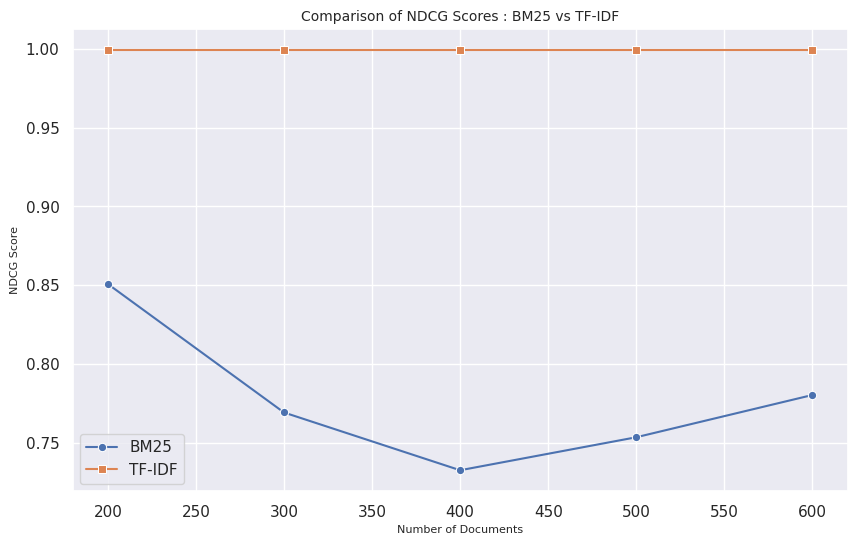

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.figure(figsize=(10, 6))

# Plot BM25 results
sns.lineplot(x=result_df_bm25['Number of Documents'], y=result_df_bm25['NDCG BM25'], label='BM25', marker='o')

# Plot TF-IDF results
sns.lineplot(x=result_df_tfidf['Number of Documents'], y=result_df_tfidf['NDCG TF-IDF'], label='TF-IDF', marker='s')

# Set plot title and labels
plt.title('Comparison of NDCG Scores : BM25 vs TF-IDF', fontsize=10)
plt.xlabel('Number of Documents', fontsize=8)
plt.ylabel('NDCG Score', fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()


As shown in the graph, the custom TF-IDF-based retrieval system maintains a stable NDCG@5 score of 0.9991, emphasizing its reliability across varying document counts. Meanwhile, the BM25 model exhibits a decreasing trend in NDCG score as the number of documents increases.

# III. Streamlit app

We also developed a Streamlit app to provide an interactive interface for information retrieval on the NFCorpus dataset. The app allows users to enter queries and retrieve relevant documents based on our custom TF-IDF retrieval system. The following is the content of the app.py file, which powers the app.

In [ ]:
import streamlit as st
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ndcg_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import loadNFCorpus as nfc

# Suppress the deprecation message
st.set_option('deprecation.showfileUploaderEncoding', False)

# Load NFCorpus data using the imported function
dicDoc, dicReq, dicReqDoc = nfc.loadNFCorpus()

# Preprocess text
@st.cache(persist=True)
def text_preprocessing(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(filtered_tokens)

# Customized TF-IDF retrieval function
@st.cache(persist=True)
def run_custom_tfidf(dicDoc, user_query, nb_docs):
    dicReqDocToKeep = defaultdict(dict)

    docsToKeep = []

    # Pre-processing and vectorization
    corpus = [text_preprocessing(doc) for doc in dicDoc.values()]
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    # Calculate TF-IDF scores for the user query and documents
    user_query_vector = tfidf_vectorizer.transform([user_query])

    for docId, doc_text in dicDoc.items():
        doc_vector = tfidf_vectorizer.transform([text_preprocessing(doc_text)])
        cos_sim = (user_query_vector * doc_vector.T).toarray()[0][0]
        docsToKeep.append((docId, cos_sim))

    # Sort the documents by their scores in descending order
    docsToKeep.sort(key=lambda x: x[1], reverse=True)

    # Take the top nb_docs documents (as specified by the user)
    top_documents = docsToKeep[:nb_docs]

    return top_documents

# Calculate NDCG@5
@st.cache(persist=True)
def calculate_ndcg(doc_scores, true_labels):
    return ndcg_score([true_labels], [doc_scores], k=5)

st.title("🔍 Custom Information Retrieval System on NFCorpus 🔍")
st.sidebar.header("📌 Project Recap")
st.sidebar.markdown("""
The goal was to develop an original information retrieval system on NFCorpus. We were allowed to use any kind of pre-treatment and manipulate the vocabulary of the documents.

**BM25 was our baseline** and we needed to find a way to improve the result. The metric used is the NDCG@5, which evaluates the top 5 results returned by the model.

👨‍💻 Authors : [Nilany KARUNATHASAN](https://www.linkedin.com/in/nilany-karunathasan-7b49691ba?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app) and [Sïndoumady SAMBATH](https://www.linkedin.com/in/s%C3%AFndoumady-sambath-a7519a209?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)
""")

# Create a form to enter the user query and trigger the button with Enter key
with st.form(key='query_form'):
    query_input = st.text_area("📝 Enter your query", height=100)
    nb_docs = st.slider("📄 Number of Documents to Consider", min_value=0, max_value=500, value=150)  # Add a slider for nb_docs
    submitted = st.form_submit_button("🔍 Retrieve Top Documents")

    if submitted or query_input:
        top_documents = run_custom_tfidf(dicDoc, query_input, nb_docs)

        st.subheader("📜 Top Documents :")

        for rank, (docId, cos_sim) in enumerate(top_documents, start=1):
            st.write(f"🏆 Rank {rank} - Document {docId} :")
            st.write(dicDoc[docId])

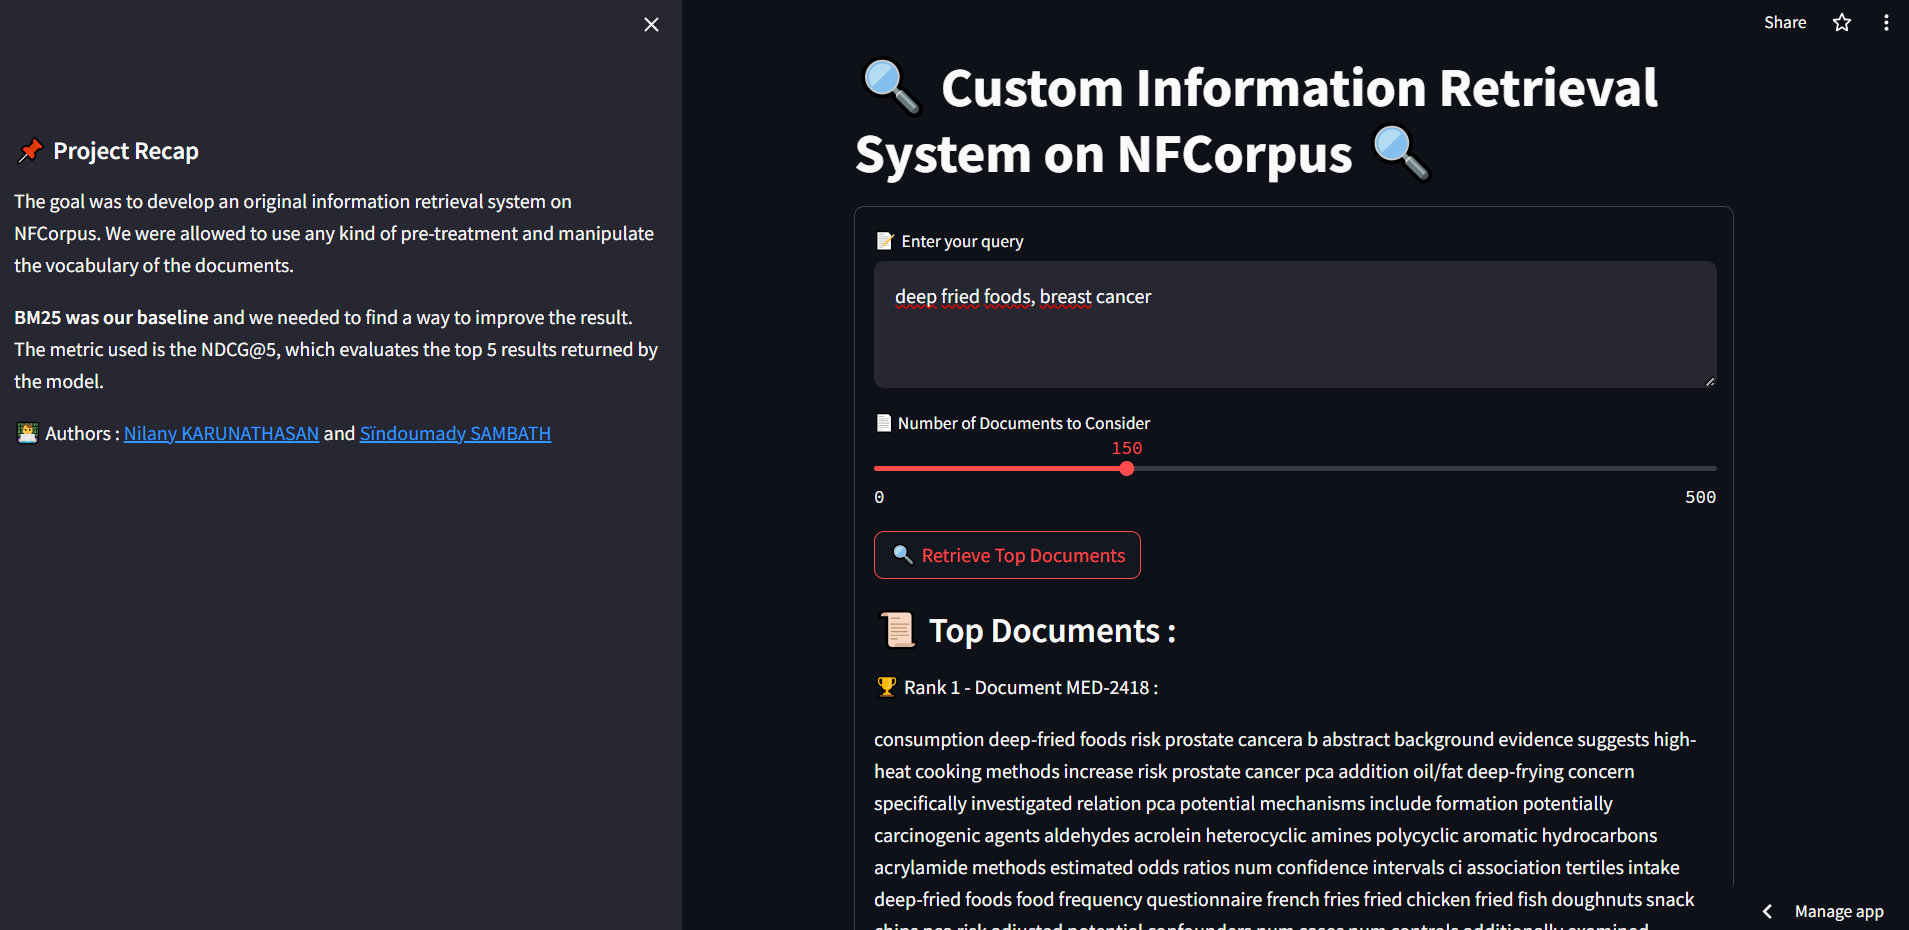